In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import optimize

In [2]:
img = np.load('./NORMALIZED-RP-STACK.npy')

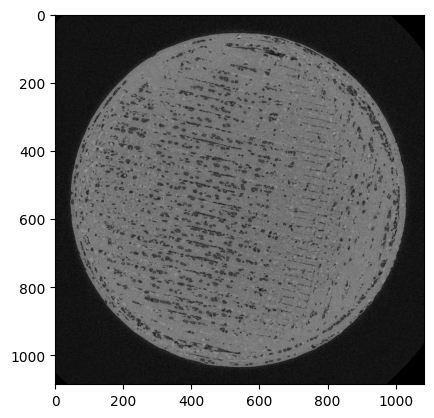

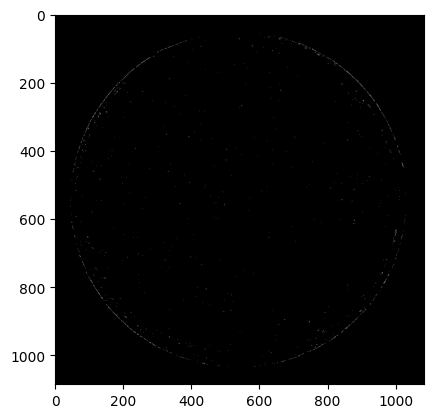

In [128]:
layer = 80
mat = img[:,:,layer]
#ret, mat = cv.threshold(testing, 2, 255, cv.THRESH_TOZERO)
mat = cv.Canny(mat, 50, 50)
bitmat = mat//255

plt.imshow(img[:,:,layer], cmap='gray')
plt.show()

plt.imshow(mat, cmap='gray')
plt.show()

In [129]:
def cost(params):
    x,y,r = np.int64(params)
    if r < 0:
        return 1e14
    mask = np.zeros([1085, 1085], dtype=np.uint8)
    mask = cv.circle(mask, [x,y], r, [1,1,1])
    return -np.sum(np.logical_and(bitmat, mask))

x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))

print(x0)
print(y0)
print(r0)

print(np.int32(r0))

Optimization terminated successfully.
         Current function value: -187.000000
         Iterations: 34
         Function evaluations: 111
532.4416666666667
546.0166666666667
488.8916666666666
488


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


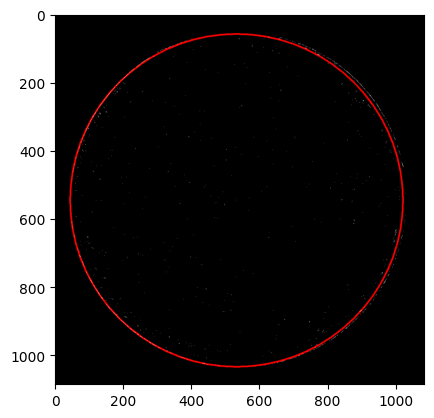

In [130]:
mask = np.zeros([1085,1085,3], dtype=np.uint8)
mask = cv.circle(mask, [np.uint32(x0), np.uint32(y0)], np.uint32(r0), [1,0,0], 3)

plh = np.zeros([1085,1085,3])
plh[:,:,0] = mat
plh[:,:,1] = mat
plh[:,:,2] = mat

plt.imshow(plh+mask)
plt.show()

In [131]:
radii = []
for i in range(1789):
    mat = img[:,:,i]
    mat = cv.Canny(mat, 50, 50)
    bitmat = mat // 255

    def cost(params):
        x,y,r = np.int64(params)
        if r < 0:
            return 1e14
        mask = np.zeros([1085, 1085], dtype=np.uint8)
        mask = cv.circle(mask, [x,y], r, [1,1,1])
        return -np.sum(np.logical_and(bitmat, mask))

    x0,y0,r0 = optimize.fmin(cost, (543, 543, 493), full_output=False, disp=False, retall=False)
    radii.append(np.int64(r0))

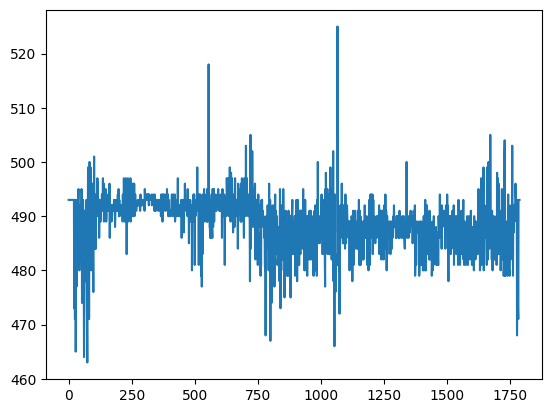

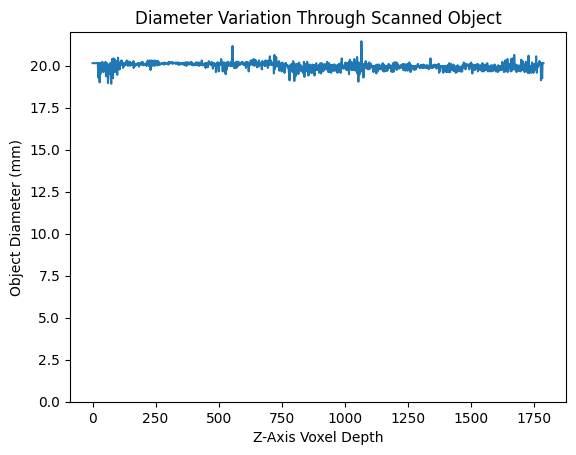

In [133]:
plt.plot(range(1789), radii)
plt.show()

dias = 2.*np.asarray(radii)*20.4382 / 1000
plt.plot(range(1789), dias)
plt.ylabel("Object Diameter (mm)")
plt.xlabel("Z-Axis Voxel Depth")
plt.title("Diameter Variation Through Scanned Object")
plt.ylim([0,22])
plt.show()